In [1]:
%matplotlib inline

from operator import itemgetter
import networkx as nx

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
from io import StringIO
from IPython.display import SVG, display

In [2]:
sns.set_context("poster")
sns.set_style("ticks")

In [3]:
G = nx.krackhardt_kite_graph()

In [4]:
G.nodes(data=True)

NodeDataView({0: {}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}})

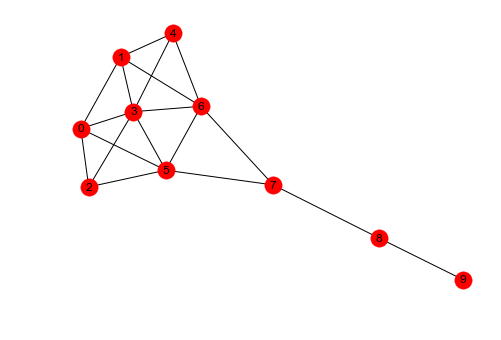

In [5]:
nx.draw(G, with_labels=True)

(array([1., 3., 2., 1.]), array([0, 1, 2, 3, 4]), <a list of 4 Patch objects>)

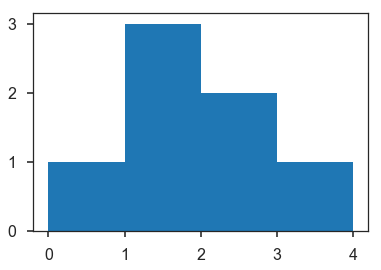

In [6]:
plt.hist(nx.degree_histogram(G), bins=list(range(5)))

In [7]:
nx.degree_centrality(G)

{0: 0.4444444444444444,
 1: 0.4444444444444444,
 2: 0.3333333333333333,
 3: 0.6666666666666666,
 4: 0.3333333333333333,
 5: 0.5555555555555556,
 6: 0.5555555555555556,
 7: 0.3333333333333333,
 8: 0.2222222222222222,
 9: 0.1111111111111111}

In [8]:
nx.betweenness_centrality(G)

{0: 0.023148148148148143,
 1: 0.023148148148148143,
 2: 0.0,
 3: 0.10185185185185183,
 4: 0.0,
 5: 0.23148148148148148,
 6: 0.23148148148148148,
 7: 0.38888888888888884,
 8: 0.2222222222222222,
 9: 0.0}

In [9]:
nx.eigenvector_centrality(G)

{0: 0.35220898139203594,
 1: 0.35220898139203594,
 2: 0.2858347353163241,
 3: 0.4810204881221006,
 4: 0.2858347353163241,
 5: 0.3976910106255469,
 6: 0.3976910106255469,
 7: 0.19586185175360382,
 8: 0.04807477501420294,
 9: 0.011164058575824238}

In [10]:
nx.closeness_centrality(G)

{0: 0.5294117647058824,
 1: 0.5294117647058824,
 2: 0.5,
 3: 0.6,
 4: 0.5,
 5: 0.6428571428571429,
 6: 0.6428571428571429,
 7: 0.6,
 8: 0.42857142857142855,
 9: 0.3103448275862069}

In [11]:
nx.clustering(G)

{0: 0.6666666666666666,
 1: 0.6666666666666666,
 2: 1.0,
 3: 0.5333333333333333,
 4: 1.0,
 5: 0.5,
 6: 0.5,
 7: 0.3333333333333333,
 8: 0,
 9: 0}

In [14]:
def get_all_centralities(G):
    df = pd.DataFrame(index=G.nodes)
    df["degree"] = pd.Series(nx.degree_centrality(G))
    df["betweenness"] = pd.Series(nx.betweenness_centrality(G))
    df["closeness"] = pd.Series(nx.closeness_centrality(G))
    df["eigenvector"] = pd.Series(nx.eigenvector_centrality(G))
    return df

In [15]:
get_all_centralities(G)

,degree,betweenness,closeness,eigenvector
0,0.444444,0.023148,0.529412,0.352209
1,0.444444,0.023148,0.529412,0.352209
2,0.333333,0.000000,0.500000,0.285835
3,0.666667,0.101852,0.600000,0.481020
4,0.333333,0.000000,0.500000,0.285835
5,0.555556,0.231481,0.642857,0.397691
6,0.555556,0.231481,0.642857,0.397691
7,0.333333,0.388889,0.600000,0.195862
8,0.222222,0.222222,0.428571,0.048075
9,0.111111,0.000000,0.310345,0.011164


In [16]:
nx.average_shortest_path_length(G)

1.9777777777777779

In [17]:
nx.density(G)

0.4

## Florentine family networks

In [18]:
from utilities import read_UCINET_matrix

In [34]:
def dict_to_values(G, dict_data):
    return [dict_data[n] for n in G.nodes]

[0.0,
 19.333333333333332,
 8.5,
 9.5,
 5.0,
 0.0,
 23.166666666666664,
 0.0,
 47.5,
 0.0,
 2.0,
 0.0,
 10.333333333333332,
 13.0,
 9.333333333333334,
 8.333333333333334]

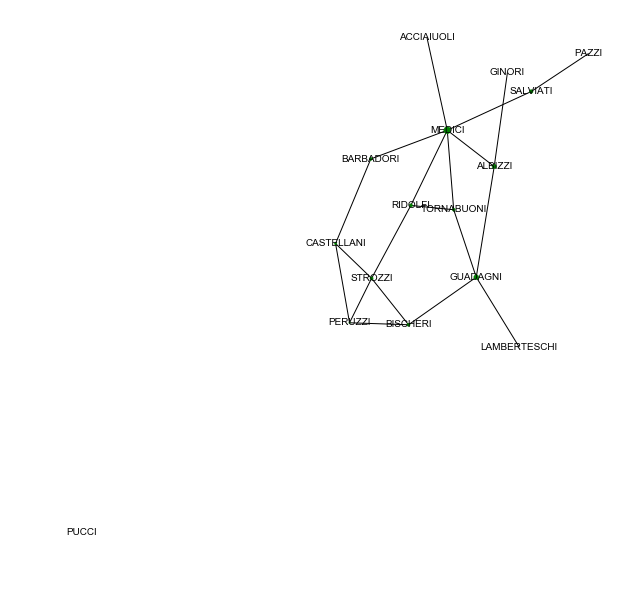

In [37]:
G = read_UCINET_matrix("../../data/padgett.xlsx", "PADGM")
fig, ax = plt.subplots(1,1, figsize=(10,10))
nx.draw(
    G, 
    pos=nx.spring_layout(G),
    with_labels=True,
    node_size=dict_to_values(G, nx.betweenness_centrality(G, normalized=False)),
    node_color="g",
    font_size=10,
)
#ax.axis("off")

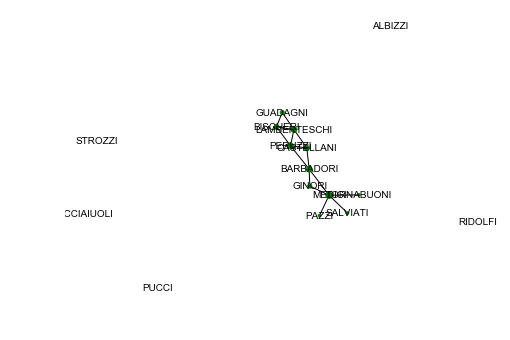

In [30]:
G = read_UCINET_matrix("../../data/padgett.xlsx", "PADGB")
nx.draw(
    G, 
    pos=nx.spring_layout(G),
    with_labels=True,
    node_size=[x[1]*10 for x in G.degree()],
    node_color="g",
    font_size=10,
)

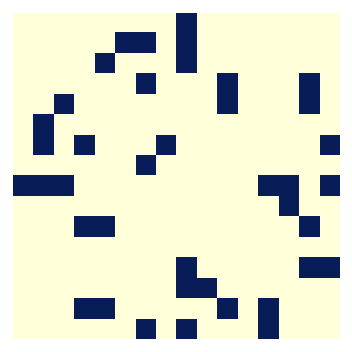

In [38]:
from nxviz import MatrixPlot

m = MatrixPlot(G)
m.draw()
plt.show()

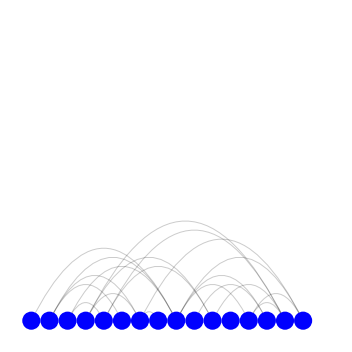

In [39]:
from nxviz import ArcPlot

a = ArcPlot(G)
a.draw()

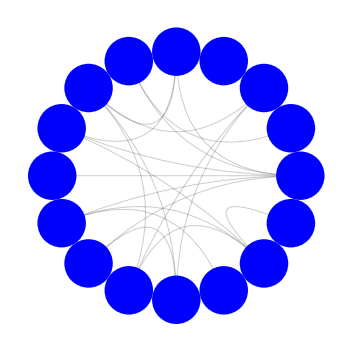

In [41]:
from nxviz import CircosPlot

c = CircosPlot(G)
c.draw()